In [1]:
%run utils.py
%run plots.py
%run parameters.py

In [2]:
%run wl.py

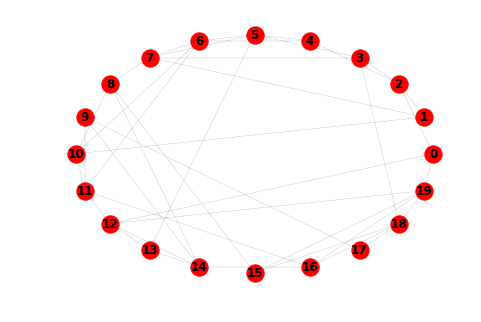

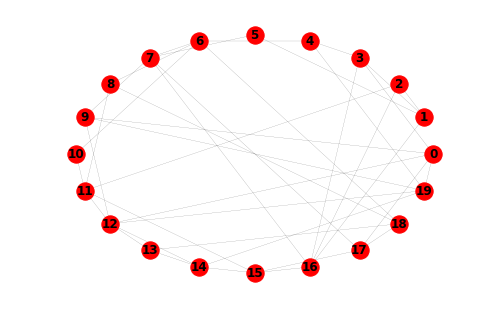

In [3]:
import copy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# select probabilities test case
probs = probability_tests["test9"]

# select graph parameters
graph_params = copy.copy(graph_parameters)

# generate training and test samples
graphs_train, labels_train, graphs_test, labels_test = generate_dataset(probs, graph_params, True)

In [4]:
# f = open('/Users/alanli/Desktop/data/simgraph.Labels','w')

# idx = 0
# # generate training and test graphs
# for counter, prob in enumerate(probs):
#     for graph in range(graphs_per_class):
#         G_train = generate_graph(num_nodes, prob, knn, m_edges, gamma, graph_type=graph_type)
#         G_test = generate_graph(num_nodes, prob, knn, m_edges, gamma, graph_type=graph_type)
#         graphs_train.append(G_train)
#         graphs_test.append(G_test)
#         labels_train.append(str(prob))
#         labels_test.append(str(prob))
#         nx.write_gexf(G_train, "/Users/alanli/Desktop/data/{}.gexf".format(idx))
#         f.write("{}.gexf ".format(idx)+str(counter)+"\n")       
#         idx += 1

# f.close()
        
#     # plt.figure(counter)
#     # nx.draw_circular(G_train, with_labels=True, font_weight='bold', width=graph_edge_width)
#     # nx.draw_spring(G_train, with_labels=True, font_weight='bold', width=graph_edge_width)
#     # print("rewiring probability: {} | cc: {} | sp {}".format(prob, cc.average_clustering(G_train),
#     #                                                         sp.average_shortest_path_length(G_train)))

In [5]:
# WL kernel

ad_list_train = []
node_label_train = []
ad_list_test = []
node_label_test = []

for graph in graphs_train:
    al = graph.adjacency_list()
    nl = nx.degree(graph).values()
    nl = [str(i) for i in nl]
    ad_list_train.append(al)
    node_label_train.append(nl)

for graph in graphs_test:
    al = graph.adjacency_list()
    nl = nx.degree(graph).values()
    nl = [str(i) for i in nl]
    ad_list_test.append(al)
    node_label_test.append(nl)
    
K_train, phi_list_train = WL_compute(ad_list_train, node_label_train, 1)
K_test, phi_list_test = WL_compute(ad_list_test, node_label_test, 1)

train_X = np.asarray(phi_list_train)[-1].toarray().T
test_X = np.asarray(phi_list_test)[-1].toarray().T

assert train_X.shape[0] == len(graphs_train), "train_X shape is not correct"
assert test_X.shape[0] == len(graphs_test), "train_X shape is not correct"

train_labels = np.array(labels_train)
test_labels = np.array(labels_test)
train_X, train_labels = unison_shuffled_copies(train_X, train_labels)
test_X, test_labels = unison_shuffled_copies(test_X, test_labels)

Number of original labels 8
K original is computed
Iteration 0: phi is computed
Number of compressed labels 408
Itaration 0: phi sparse saved
Iteration 0: K is computed
Number of original labels 8
K original is computed
Iteration 0: phi is computed
Number of compressed labels 405
Itaration 0: phi sparse saved
Iteration 0: K is computed


In [6]:
%run classify.py

In [7]:
# select model
model = classifiers["svm"]
parameters = parameters_search["svm"]
clf = GridSearchCV(model, parameters)

# PCA
pca = PCA(n_components=0.99)
train_X_pca = pca.fit_transform(train_X)
test_X_pca = pca.transform(test_X)

# Training session 1
print(">>> no PCA")
clf.fit(train_X, train_labels)
train_predictions = clf.predict(train_X).reshape(-1,1)
test_predictions = clf.predict(test_X).reshape(-1,1)
print_results(np.ravel(train_predictions), train_labels, "Train Accuracy")
print_results(np.ravel(test_predictions), test_labels, "Test Accuracy")
print("best score: {} | best params: {}".format(clf.best_score_, clf.best_params_))

# Training session 2
print("\n>>> no PCA - log degree")
clf.fit(np.log(train_X+1), train_labels)
train_predictions = clf.predict(np.log(train_X+1)).reshape(-1,1)
test_predictions = clf.predict(np.log(test_X+1)).reshape(-1,1)
print_results(np.ravel(train_predictions), train_labels, "Train Accuracy")
print_results(np.ravel(test_predictions), test_labels, "Test Accuracy")
print("best score: {} | best params: {}".format(clf.best_score_, clf.best_params_))

# Training session 3
print("\n>>> PCA with 99% variance retained")
clf.fit(train_X_pca, train_labels)
train_predictions = clf.predict(train_X_pca).reshape(-1,1)
test_predictions = clf.predict(test_X_pca).reshape(-1,1)
print_results(np.ravel(train_predictions), train_labels, "Train Accuracy")
print_results(np.ravel(test_predictions), test_labels, "Test Accuracy")
print("best score: {} | best params: {}".format(clf.best_score_, clf.best_params_))

>>> no PCA
Train Accuracy: 0.76
Test Accuracy: 0.68
best score: 0.51 | best params: {'C': 0.1, 'kernel': 'rbf'}

>>> no PCA - log degree
Train Accuracy: 0.77
Test Accuracy: 0.64
best score: 0.52 | best params: {'C': 0.1, 'kernel': 'rbf'}

>>> PCA with 99% variance retained
Train Accuracy: 0.83
Test Accuracy: 0.68
best score: 0.53 | best params: {'C': 1, 'kernel': 'rbf'}
